# Lecture 18 - SymPy: Symbols, Expressions, and Equations.

## Overview, Objectives, and Key Terms
 
From [Lecture 1](ME400_Lecture_7.ipynb) through [Lecture 17](ME400_Lecture_17.ipynb), the focus has been squarely on the fundamentals of programming, with some basic numerical tools (like numerical arrays and plotting) and best practices (like unit testing) included along the way.  This lecture marks a transition to new topics that will leverage the material already covered and provide students with tools for solving difficult analytical or numerical problems common to upper-level engineering courses.  In particular, the SymPy module will be used to define *symbols* and *symbolic expressions*, leading to a very different (but very useful) tool for the engineer's toolbox.

### Objectives

By the end of this lesson, you should be able to

- Define symbols and symbolic expressions using SymPy
- Define and solve systems of symbolic equations
- Manipulate expressions by applying simplification and other symbolic tools. 

### Key Terms

- `sympy`
- `sympy.Symbol`
- `sympy.symbols`
- `sympy.init_printing`
- `sympy.solve`
- `sympy.evalf`
- `sympy.simplify`
- `sympy.expand`
- `sympy.collect`

## Symbols 

Symbolic computation based on *symbols* rather than *values*.

In Python, symbolic computing via SymPy: 

In [4]:
import sympy as sy # note sy and not sp; just be consistent

Defining symbols:

In [6]:
x = sy.Symbol('x')
x

x

In [7]:
type(x)

sympy.core.symbol.Symbol

In [9]:
x, y, z = sy.symbols('x y z')

What not to do:

In [11]:
v = sy.Symbol('u')
v

u

## Nicer Output

In [12]:
sy.init_printing()

In [13]:
x

In [14]:
x**2

More complicated symbols are supported:

In [15]:
phi, y_0 = sy.symbols('phi y_0')

In [17]:
phi, y_0

## Symbolic Expressions

Symbols are combined using operators to make **symbolic expressions**.  

In [21]:
m, c = sy.symbols('m c')
m*c**2

Note: the order of symbols stored may differ from original definition.

When storing expressions, Sympy often performs simplification automatically, e.g.,

In [23]:
x*x*x*x

but not always, e.g.,

In [24]:
x*(x+2)

Symbolic expressions can be variables just like any other expressions:

In [25]:
E = m*c**2
E

Now, `E` is a symbolic variable and can be manipulated just like any other symbol, e.g., 

In [26]:
E**2

Good practice for all problem solving: **do not substitute numbers until the end!**

With SymPy:

In [27]:
E.subs(c, 3e8)

Note that this does *not* change the original expression:

In [28]:
E

Save the result of the substitution with another variable:

In [29]:
Esub = E.subs(c, 3e8)
Esub

Substitute $m = m_0 / \sqrt{1+(c/v)^2}$ in $E$:

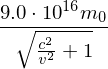

In [31]:
m_0, v = sy.symbols('m_0 v')
E.subs({m:m_0/sy.sqrt(1+(c/v)**2), c:3e8})

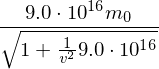

In [33]:
E.subs({m: m_0/sy.sqrt(1+(c/v)**2)}).subs({c: 3e8})

## Symbolic Equations

The syntax `E = mc**2` is **not** an equation; it is **assignment**.

A **symbolic equation**, e.g., $ax = by$ is defined via

In [36]:
a, b, x, y = sy.symbols('a b x y')
sy.Eq(a*x, b*y)

Save the equation as a variable:

In [44]:
eq1 = sy.Eq(a*x, b*y)

Solve for `y` in terms of `x`:

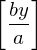

In [50]:
sy.solve(eq1, x) # Note the type returned

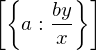

In [51]:
sy.solve(eq1) # Note the type returned

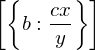

In [52]:
sy.solve(sy.Eq(c*x, b*y)) # Note the type returned

**Note**: Always specify the names of variables to be solved.

### Systems of Equations

Define a second equation $cx - dy = 1$ and (with $ax = by$) solve for $x$ and $y$:

In [56]:
d = sy.Symbol('d')
eq2 = c*x - d*y + 1 # Wait, no Eq??
eq2

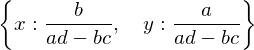

In [58]:
sy.solve([eq1, eq2], x, y)

**Exercise**: Solve $a x^2 + b x + c = 0$ for $x$, and name the solutions $x_0$ and $x_1$.

**Exercise**: Given $3a + 4b + 7c + 11 = 0$, $5a + 3b + 3c + 4 = 0$, and $7a + 13b + 5c + 9=0$, find $a$, $b$, and $c$.

## Numerical Evaluation

After the final, symbolic is found, **then evaluate numerically**.

Possible steps:
 - `expr.subs`
 - `expr.evalf`

In [61]:
expr = sy.sin(x**3)
expr

In [62]:
expr_sub = expr.subs({x: 3})
expr_sub

In [63]:
expr_sub.evalf() # SymPy Float

In [65]:
float(expr_sub) # Python float

In [64]:
expr_sub.evalf(5)

SymPy let's one use numbers with arbitrary precision.  Compare the following:

In [66]:
"{:.20f}".format(0.1)

'0.10000000000000000555'

In [68]:
sy.Float(0.1, 20)

In [69]:
sy.Float('0.1', 20)

## Other Symbolic Tools

Simplification:

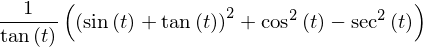

In [70]:
t = sy.Symbol('t')
expr = ((sy.sin(t)+sy.tan(t))**2 + sy.cos(t)**2 - sy.sec(t)**2) / sy.tan(t)
expr

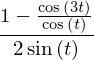

In [71]:
expr.simplify()

Expanding expressions and collecting like terms:

In [74]:
expr = (a*x+b*y)**2*(c*x+d*y)
expr

In [75]:
expr.expand()

In [76]:
expr.expand().collect(x)

## Lambdify and Plotting

Consider a symbolic expression representing the function $f(x) = x^2$:

In [78]:
f = x**2
f

Use `lambdify` to produce a callable function for `f`:

In [86]:
f_fun = sy.lambdify(x, f)

In [87]:
f_fun(1.414)

In [93]:
import numpy as np
f_fun(np.array([1,2,3]))

array([1, 4, 9])

SymPy has a built in `plot` function, but it's not very flexible.  Rather, take these steps to plot `expr` that depends on `x`:
 - Define all symbols, solve all equations, and make any substitutions needed to define `expr`
 - Define `expr_fun` via `sy.lambdify(x, expr)`
 - Define `x_plot` as `np.array` with values for plotting
 - Define `expr_plot` as `expr_fun(x)` for plotting
 - Plot `plt.plot(x_plot, expr_plot)` etc.

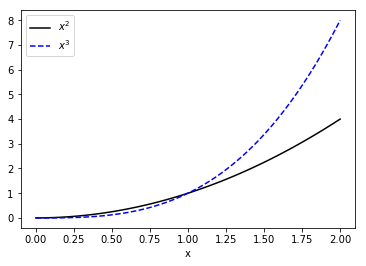

In [94]:
import matplotlib.pyplot as plt
# x is a symbol, but we'll need actual value to 
# plot.  Here, x_plot indicates its purpose as the 
# values of x to be used for plotting.
x_plot = np.linspace(0, 2)
f_plot = f_fun(x_plot) # x**2
g = x**3
g_fun = sy.lambdify(x, g)
g_plot = g_fun(x_plot)
plt.plot(x_plot, f_plot, 'k-', label='${}$'.format(sy.latex(f)))
plt.plot(x_plot,  g_plot, 'b--', label='${}$'.format(sy.latex(g)))
plt.xlabel('x')
plt.legend()
plt.show()

## Recap

You should now be able to 
- Define symbols and symbolic expressions using SymPy
- Define and solve systems of symbolic equations
- Manipulate expressions by applying simplification and other symbolic tools. 